In [71]:
import pandas as pd
import numpy as np

In [72]:
dataset = pd.read_csv('RansomwareData.csv')

In [73]:
# 데이터 셋 구조확인

print(dataset.info())
print(dataset.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Columns: 30970 entries, 10001 to 0.30934
dtypes: int64(30970)
memory usage: 359.9 MB
None
   10001  1  2  0  0.1  0.2  0.3  0.4  0.5  0.6  ...  0.30925  0.30926  \
0  10002  1  3  1    0    1    0    1    0    1  ...        0        0   
1  10003  1  2  0    0    0    0    0    0    0  ...        0        0   
2  10005  1  5  0    0    0    0    1    0    0  ...        0        0   
3  10006  1  7  1    0    1    0    0    1    1  ...        0        0   
4  10007  1  5  0    0    0    0    0    0    0  ...        0        0   

   0.30927  0.30928  0.30929  0.30930  0.30931  0.30932  0.30933  0.30934  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0 

In [74]:
dataset

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,21254,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,21255,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1520,21256,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1521,21258,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
dataset.columns = [i for i in range(1, 30971)]

In [76]:
dataset

,1,2,3,4,5,6,7,8,9,10,...,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,21254,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,21255,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1520,21256,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1521,21258,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# 데이터 비어 있는 것 확인 (예송언니 코드)
# 데이터 셋 나누기

# 2번 Label => 1 (ransomeware) / 0 (Goodware)
# 3번 Ransomeware Family => 0 goodware

from sklearn.model_selection import train_test_split

data = dataset.drop([2, 3], axis = 1)
label = dataset.iloc[:,[1, 2]]

In [78]:
data

,1,4,5,6,7,8,9,10,11,12,...,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970
0,10002,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,21254,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,21255,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1520,21256,0,0,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1521,21258,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
label

,2,3
0,1,3
1,1,2
2,1,5
3,1,7
4,1,5
...,...,...
1518,0,0
1519,0,0
1520,0,0
1521,0,0


In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    label, 
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [81]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1218, 30968)
X_test:  (305, 30968)
y_train:  (1218, 2)
y_test:  (305, 2)


In [82]:
X_train

,1,4,5,6,7,8,9,10,11,12,...,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970
1280,20920,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
81,10171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426,21127,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1033,20624,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1173,20789,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,20738,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1294,20942,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
860,20384,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1459,21168,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# feature 뽑기 위해 data scaling -> 표준화
# PCA전 데이터 스케일링을 하는 이유는 데이터의 스케일에 따라 분산량이 다를 수 있기 떄문
# 0아님 1인 바이너리 데이터도 scaling이 필요한가?

# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984

#from sklearn.decomposition import PCA

#pca = PCA(n_components = ) # feture 뽑기...?

In [109]:
# RandomForestClassifier 차이 확인하기
from sklearn.ensemble import RandomForestRegressor


X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.2,
                                                  shuffle = True,
                                                  random_state = 42)

In [116]:
print('X_train: ', X_train.shape)
print('X_val: ', X_val.shape)
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)

X_train:  (254, 30968)
X_val:  (64, 30968)
y_train:  (254, 2)
y_val:  (64, 2)


In [117]:
# 데이터 전처리 작업 수치로 변환 -> 필요성이 있는지 궁금함

#X_train = pd.get_dummies(X_train) 
#y_train = pd.get_dummies(y_train)

In [118]:
model_rf = RandomForestRegressor()

In [119]:
model_rf = model_rf.fit(X_train, y_train)

In [120]:
accuracy = model_rf.score(X_val, y_val)
print('RandomForest mean accuracy : ', accuracy)

RandomForest mean accuracy :  0.8660753714290874


In [121]:
features = X_train.columns

In [123]:
importances = model_rf.feature_importances_

In [125]:
# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
import matplotlib.pyplot as plt

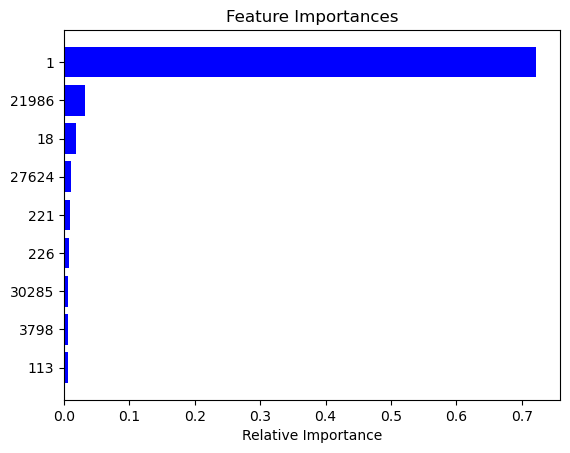

In [126]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()